<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## PAC 1: Sistemas recomendadores y algoritmos de agrupamiento

### Presentación

En este CAE aprenderá sobre sistemas de recomendación y técnicas de agrupación de datos (clustering).

### Habilidades

En este trabajo se abordan las siguientes competencias generales desarrolladas en el Máster:
* Capacidad para proyectar, visualizar y diseñar productos, procesos y
Instalaciones en todos los ámbitos de la ingeniería informática.
* Habilidades en modelización matemática, cálculo y simulación en
centros tecnológicos e ingeniería empresarial, especialmente en investigación,
Tareas de desarrollo e innovación en todos los ámbitos relacionados con la informática.
ingeniería.
* Capacidad para aplicar los conocimientos adquiridos y resolver problemas en temas nuevos o
entornos desconocidos dentro de contextos más amplios y multidisciplinarios,
y ser capaz de integrar estos conocimientos.
* Habilidades para el aprendizaje continuo, autodirigido y autónomo.
* Capacidad para modelar, diseñar, definir arquitectura, implementar, gestionar,
operar, gestionar y mantener aplicaciones, redes, sistemas,
servicios y contenidos informáticos.

Las habilidades específicas de esta asignatura que se abordan en esta prueba son:
* Comprender qué es el aprendizaje automático en el contexto de lo artificial.
inteligencia.
* Distinguir entre diferentes tipos y métodos de aprendizaje.
* Aplicar las técnicas estudiadas a un caso real.

### Objetivos

En este CAE aprenderá cómo explorar un nuevo conjunto de datos, cómo funcionan los sistemas de recomendación y cómo utilizar algoritmos de agrupación. Trabajará con funciones de similitud y utilizará la conocida biblioteca _Surprise_ para desarrollar sistemas de recomendación.

### Recursos

Esta PEC requiere los siguientes recursos:

Archivos proporcionados:

* Este archivo .ipynb que tendrás que rellenar con tus respuestas.
* Los archivos movies.csv y ratings.csv, que contienen los datos necesarios. https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset/data

Materiales complementarios:

* Materiales del curso, documentación de la biblioteca (_NumPy_, _pandas_, _seaborn_, _surprise_,...).

###Criterios de presentación y evaluación

La PEC deberá presentarse antes del **9 de abril a las 23:59h**.

El envío final debe ser una versión editada de este cuaderno (.ipynb). Se recomienda el uso de la plataforma Google Colab (https://colab.research.google.com/). Las soluciones del código fuente de los ejercicios deben **implementarse y ejecutarse** en las celdas de código correspondientes y la discusión relacionada y las respuestas justificadas deben agregarse a la celda de texto correspondiente.

Todas las respuestas deben ser discutidas y justificadas. **Respuestas sin
La discusión no será evaluada**.

Los ejercicios se evaluarán considerando tanto la corrección técnica de la solución como la justificación y argumentación del procedimiento y de los resultados.

### Descripción

En esta tarea, estudiará conceptos relacionados con el desarrollo de sistemas de recomendación y el uso de técnicas de agrupación. En los ejercicios propuestos utilizará una base de datos que utiliza el conjunto de datos MovieLens, un conjunto de datos ampliamente utilizado en el campo de los sistemas de recomendación. El conjunto de datos (ml-latest-small) describe la actividad de calificación de 5 estrellas y etiquetado de texto libre de MovieLens, un servicio de recomendación de películas. Contiene 100836 clasificaciones y 3683 aplicaciones de etiquetas en 9742 películas.

Puede encontrar información detallada en https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html


#### El entorno de programación

En esta tarea tendrás que programar en Python y utilizar bibliotecas populares como _Pandas_, _NumPy_ o _seaborn_. Encontrarás estas bibliotecas instaladas en tu entorno de Google Colab.

También utilizará la biblioteca de recomendación _Surprise_ http://surpriselib.com/, que no está incluida en el entorno de Google Colab pero se puede instalar fácilmente como se describe a continuación.



## EJERCIO 1 (3 puntos): Exploración del conjunto de datos

**a) (0,5 puntos)** Leer los archivos de datos y almacenarlos en un _Pandas_ _Dataframe_ y proporcionar una descripción de sus principales características

In [1]:
from google.colab import drive
# Montamos la unidad de Google Drive que alberga nuestros conjuntos de datos
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Definir las rutas a los archivos CSV
ratings_path = '/content/drive/My Drive/ratings.csv'
movies_path = '/content/drive/My Drive/movies.csv'

# Cargamos los datos desde los archivos CSV a DataFrames de Pandas

# Leemos el archivo de calificaciones
ratings_df = pd.read_csv(ratings_path)
# Leemos el archivo de películas
movies_df = pd.read_csv(movies_path)

# Proporcionamos una descripción general de los datos

# Realizamos una descripción de las calificaciones
ratings_description = ratings_df.describe()
# Realizamos una descripción de las películas
movies_description = movies_df.describe()

# Imprimimos las descripciones y las primeras filas de cada DataFrame para la inspección de los datos
print("Descripción del DataFrame de las calificaciones:")
print(ratings_description)
print("\nDescripción del DataFrame de películas:")
print(movies_description)

print("\nPrimeras filas del DataFrame de las calificaciones:")
print(ratings_df.head())
print("\nPrimeras filas del DataFrame de las películas:")
print(movies_df.head())


Descripción del DataFrame de las calificaciones:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

Descripción del DataFrame de películas:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Primeras filas del DataFrame de las calificaciones:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1      

**b) (1,5 puntos)** Una vez cargado el conjunto de datos, hagamos un análisis exploratorio.

Complete la siguiente celda para guardar la información solicitada en cada variable correspondiente (los tipos de datos deben coincidir con el código proporcionado):

- ¿Cuántas películas hay?
- ¿Cuántos usuarios hay?
- ¿Cuáles son las calificaciones medias más altas y más bajas? Reportar una película de cada caso.
- ¿Qué película tiene mayor número de ratings?

Utilice las funciones de pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) para obtener las calificaciones promedio, [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) para eliminar columnas innecesarias, [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) para buscar filas/índice por condición y [.iloc](
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) para acceder a una fila/índice específico.



In [3]:
# Eliminamos la columna 'timestamp' de ratings_df ya que no se utiliza
ratings_df_cleaned = ratings_df.drop(columns=['timestamp'])

# Calculamos la calificación promedio para cada película
mean_ratings = ratings_df_cleaned.groupby('movieId')['rating'].mean().rename('mean_rating')

# Unimos las calificaciones promedio con los detalles de las películas
movies_with_mean_ratings = movies_df.set_index('movieId').join(mean_ratings)

# Identificamos la película con la calificación promedio más alta
highest_rated_movie = movies_with_mean_ratings.loc[movies_with_mean_ratings['mean_rating'].idxmax(), 'title']

# Identificamos la película con la calificación promedio más baja
lowest_rated_movie = movies_with_mean_ratings.loc[movies_with_mean_ratings['mean_rating'].idxmin(), 'title']

# Calculamos el número de calificaciones por película
ratings_count = ratings_df.groupby('movieId').size()

# Identificamos la película con el mayor número de calificaciones
most_rated_movie_id = ratings_count.idxmax()
most_rated_movie_title = movies_df.loc[movies_df['movieId'] == most_rated_movie_id, 'title'].iloc[0]

# Finalmente, presentamos los resultados
print(f"Número total de películas: {movies_df['movieId'].nunique()}")
print(f"Número total de usuarios: {ratings_df['userId'].nunique()}")
print(f"Película con la calificación media más alta: {highest_rated_movie}")
print(f"Película con la calificación media más baja: {lowest_rated_movie}")
print(f"Película con el mayor número de calificaciones: {most_rated_movie_title}")


Número total de películas: 9742
Número total de usuarios: 610
Película con la calificación media más alta: Lamerica (1994)
Película con la calificación media más baja: Gypsy (1962)
Película con el mayor número de calificaciones: Forrest Gump (1994)


**c) (puntuación de 0,5)** Crea un gráfico de histograma con la distribución de las calificaciones promedio de las películas. Utilice seaborn.histplot y configure el parámetro *bins* para crear el gráfico. Indique con líneas verticales la media y la media $\pm$ std.

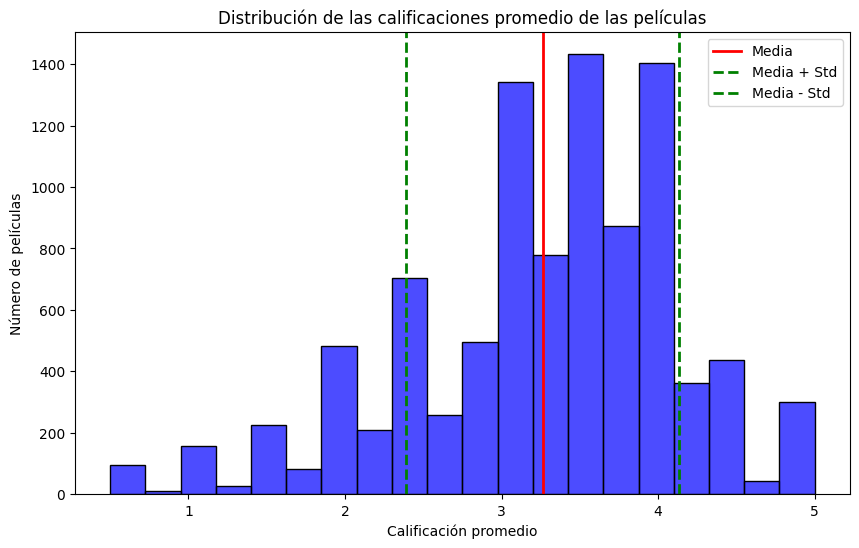

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la calificación promedio por película

# Esto nos da una serie donde el índice es movieId y el valor es la calificación promedio
ratings_mean = ratings_df.groupby('movieId')['rating'].mean()

# Calculamos las estadísticas claves: media y desviación estándar de las calificaciones promedio
mean_rating = ratings_mean.mean()
std_rating = ratings_mean.std()

# Configuramos el gráfico de histograma
plt.figure(figsize=(10, 6))  # Dimensiones del gráfico

# Creamos el histograma de las calificaciones promedio usando Seaborn
# 'bins' definimos cuántos contenedores utilizar, 'kde' es la estimación de densidad del kernel
sns.histplot(ratings_mean, bins=20, kde=False, color='blue', alpha=0.7)

# Añadimos un título y las etiquetas del gráfico
plt.title('Distribución de las calificaciones promedio de las películas')
plt.xlabel('Calificación promedio')
plt.ylabel('Número de películas')

# Añadimos líneas verticales para la media y la media ± desviación estándar
# Esto nos permite visualizar la dispersión de las calificaciones alrededor de la media
plt.axvline(mean_rating, color='red', linestyle='-', linewidth=2, label='Media')
plt.axvline(mean_rating + std_rating, color='green', linestyle='--', linewidth=2, label='Media + Std')
plt.axvline(mean_rating - std_rating, color='green', linestyle='--', linewidth=2, label='Media - Std')

# Finalmente mostramos leyenda y el gráfico de histograma
plt.legend()
plt.show()

**d) (puntuación de 0,5)** Cree un diagrama de barras con las 10 películas más recomendadas calificadas por al menos 5 usuarios

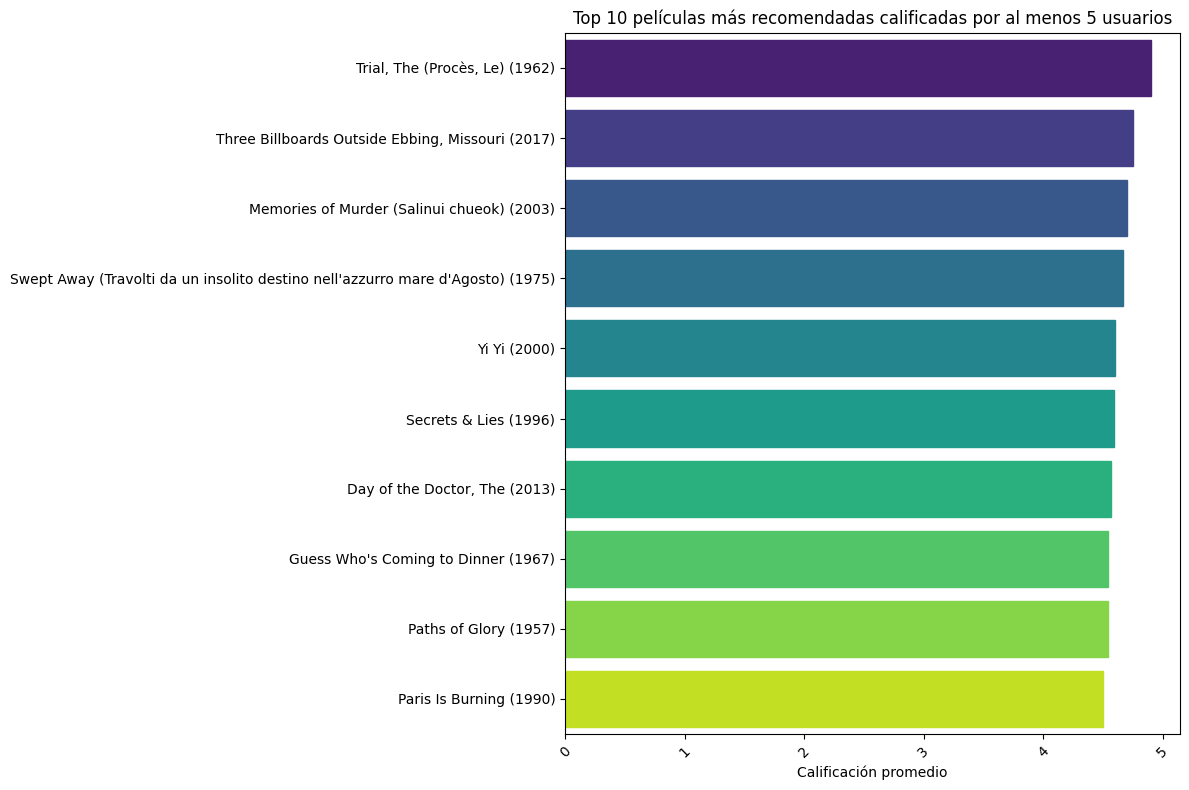

In [5]:
import seaborn as sns

# Filtramos las películas basándonos en el número mínimo de calificaciones
min_ratings = 5
movie_rating_counts = ratings_df.groupby('movieId').size()
movies_with_enough_ratings = movie_rating_counts[movie_rating_counts >= min_ratings].index

# Filtrarmos las calificaciones para incluir solo aquellas películas con suficientes calificaciones
filtered_ratings = ratings_df[ratings_df['movieId'].isin(movies_with_enough_ratings)]

# Calculamos la calificación promedio para las películas filtradas
mean_ratings = filtered_ratings.groupby('movieId')['rating'].mean()

# Identificamos las 10 películas con las calificaciones promedio más altas
top_10_movies = mean_ratings.nlargest(10)

# Extraemos los títulos de las 10 películas seleccionadas
top_10_movies_titles = movies_df.set_index('movieId').loc[top_10_movies.index, 'title']

# Creamos el diagrama de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_10_movies.values, y=top_10_movies_titles, color='lightblue')
# Aplicamos manualmente los colores de la paleta a cada barra
palette = sns.color_palette("viridis", n_colors=len(top_10_movies))
for bar, color in zip(barplot.patches, palette):
    bar.set_color(color)

plt.title('Top 10 películas más recomendadas calificadas por al menos 5 usuarios')
plt.xlabel('Calificación promedio')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## EXERCICIO 2 (3.5 PUNTOS): Recomendadores con la librería surprise

En este ejercicio trabajaremos con la biblioteca _Surprise_. _Surprise_ no está instalado en su entorno de Google Colab. Para poder instalarlo debes ejecutar la siguiente celda

In [6]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162728 sha256=e7c44bf0aab446f3eece25dd5295afae6251fdde8c3e7bc313a7b309e1c6c1b5
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


**a) (1 punto)**
Utilice _Surprise_ y el 80% de los datos para entrenar los siguientes algoritmos (parámetros predeterminados) para predecir las calificaciones de los usuarios:

* KNNBasic (_surprise.KNNBasic_)
* KNNBaseline (_surprise.KNNBaseline_)
* KNNWithMeans (_surprise.KNNWithMeans_)
* Predictor normal (_surprise.Predictor normal_)

Utilizando la métrica del error cuadrático medio, ¿cuál es el rendimiento de cada algoritmo en el 20% restante de los datos (conjunto de prueba)?

In [7]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic, KNNBaseline, KNNWithMeans, NormalPredictor
from surprise import accuracy

# Configuración inicial para cargar el conjunto de datos
# Definir el rango de las calificaciones (ajústalo según tu conjunto de datos)
reader = Reader(rating_scale=(0.5, 5))

# Cargar los datos de calificaciones desde el DataFrame
# Asegúrate de que ratings_df contenga las columnas userId, movieId, y rating
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# División del conjunto de datos: 80% para entrenamiento y 20% para pruebas
trainset, testset = train_test_split(data, test_size=0.2)

# Diccionario para almacenar los algoritmos a evaluar
algorithms = {
    'KNNBasic': KNNBasic(),
    'KNNBaseline': KNNBaseline(),
    'KNNWithMeans': KNNWithMeans(),
    'NormalPredictor': NormalPredictor(),
}

# Bucle para entrenar y evaluar cada algoritmo
for name, algorithm in algorithms.items():
    print(f'Evaluando {name}...')
    # Entrenamiento del algoritmo con el conjunto de entrenamiento
    algorithm.fit(trainset)
    # Predicción de las calificaciones en el conjunto de prueba
    predictions = algorithm.test(testset)
    # Cálculo y presentación del RMSE para el algoritmo actual
    rmse = accuracy.rmse(predictions, verbose=True)
    # Incluirá información de diagnóstico de los algoritmos KNN durante el entrenamiento.
    print(f'{name} - Test RMSE: {rmse}\n')

Evaluando KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9336
KNNBasic - Test RMSE: 0.9335543121363585

Evaluando KNNBaseline...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8666
KNNBaseline - Test RMSE: 0.8666452574940043

Evaluando KNNWithMeans...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8882
KNNWithMeans - Test RMSE: 0.8882041507792097

Evaluando NormalPredictor...
RMSE: 1.4221
NormalPredictor - Test RMSE: 1.4221152574177045



**b) (0,5 puntos)** Para el modelo con el RMSE más bajo/mejor, informe las calificaciones estimadas y reales para los cinco primeros elementos del conjunto de prueba.

In [8]:
from surprise import accuracy

# Añadimos una modificación para almacenar los resultados de RMSE de cada algoritmo
rmse_results = {}

# Modificamos el bucle de evaluación para almacenar los RMSE
for name, algorithm in algorithms.items():
    print(f'Evaluando {name}...')
    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    rmse_results[name] = rmse

# Encontrar el nombre del algoritmo con el RMSE más bajo
best_algorithm_name = min(rmse_results, key=rmse_results.get)

# Volver a entrenar y predecir con el mejor algoritmo si es necesario
best_algorithm = algorithms[best_algorithm_name]
best_algorithm.fit(trainset)
best_predictions = best_algorithm.test(testset)

# Mostrar las calificaciones estimadas y reales para los primeros cinco elementos del conjunto de prueba
print(f"\nModelo con el RMSE más bajo: {best_algorithm_name}")
print("Calificaciones estimadas y reales para los primeros cinco elementos del conjunto de prueba:")
for i in range(5):
    user_id = best_predictions[i].uid
    movie_id = best_predictions[i].iid
    real_rating = best_predictions[i].r_ui
    estimated_rating = best_predictions[i].est
    print(f"Usuario: {user_id}, Película: {movie_id}, Real: {real_rating}, Estimado: {estimated_rating}")

Evaluando KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9336
Evaluando KNNBaseline...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8666
Evaluando KNNWithMeans...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8882
Evaluando NormalPredictor...
RMSE: 1.4294
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

Modelo con el RMSE más bajo: KNNBaseline
Calificaciones estimadas y reales para los primeros cinco elementos del conjunto de prueba:
Usuario: 187, Película: 1203, Real: 4.0, Estimado: 4.3131184861222
Usuario: 381, Película: 27706, Real: 3.5, Estimado: 3.2711866635798943
Usuario: 190, Película: 5481, Real: 3.0, Estimado: 2.963160263847061
Usuario: 567, Película: 122926, Real: 4.0, Estimado: 2.678778276580888
Usuario: 380, Película: 344, Real: 5.0, Estimado: 3.31381508368721


**c) (1 punto)** Escriba un código para obtener las n predicciones principales de cada usuario del conjunto de datos de prueba, indicando el ítem, la puntuación verdadera y estimada. Tenga en cuenta que la biblioteca Surprise devuelve las predicciones como una lista. Utilice el código para imprimir las principales recomendaciones de un usuario elegido y el título de las películas recomendadas.

In [9]:
from collections import defaultdict

# Supongamos que best_predictions contiene las predicciones del modelo con el mejor RMSE

def get_top_n(predictions, n=10):
    '''Devuelve las top n predicciones para cada usuario de un conjunto de predicciones.'''

    # Mapear las predicciones para cada usuario
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, true_r, est))

    # Ordenar las predicciones para cada usuario y obtener las top n
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[2], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Obtener las top n recomendaciones para cada usuario
n = 5
top_n_predictions = get_top_n(best_predictions, n=n)

# Un user_id específico
some_user_id = list(top_n_predictions.keys())[0]  # Tomamos el primer user_id disponible
print(f"Un user_id para usar podría ser: {some_user_id}")

# Elegir un usuario y imprimir sus top n recomendaciones
user_id = some_user_id  # Tomamos un usuario existente en top_n_predictions
print(f"Top {n} recomendaciones para el usuario {user_id}:")

print(f"Verificando si el usuario {user_id} está en top_n_predictions: {'Yes' if user_id in top_n_predictions else 'No'}")
print(f"Predicciones para el usuario {user_id}: {top_n_predictions.get(user_id, 'Ninguna predicción encontrada')}")


for movie_id, true_rating, est_rating in top_n_predictions[user_id]:
    movie_title = movies_df.loc[movies_df['movieId'] == int(movie_id), 'title'].iloc[0]
    print(f"Ítem: {movie_title}, Puntuación Verdadera: {true_rating}, Estimada: {est_rating:.2f}")

Un user_id para usar podría ser: 187
Top 5 recomendaciones para el usuario 187:
Verificando si el usuario 187 está en top_n_predictions: Yes
Predicciones para el usuario 187: [(7981, 4.0, 4.406434749459122), (27879, 4.5, 4.358603885390489), (1201, 5.0, 4.334024704565492), (1203, 4.0, 4.3131184861222), (1136, 4.0, 4.304023402505693)]
Ítem: Infernal Affairs (Mou gaan dou) (2002), Puntuación Verdadera: 4.0, Estimada: 4.41
Ítem: DiG! (2004), Puntuación Verdadera: 4.5, Estimada: 4.36
Ítem: Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966), Puntuación Verdadera: 5.0, Estimada: 4.33
Ítem: 12 Angry Men (1957), Puntuación Verdadera: 4.0, Estimada: 4.31
Ítem: Monty Python and the Holy Grail (1975), Puntuación Verdadera: 4.0, Estimada: 4.30


**d) (1 punto)** Una de las medidas de desempeño más relevantes en los sistemas de recomendación son la precisión y el recall. Definimos un ítem como relevante cuando la calificación real es superior a un cierto umbral T (3,5 sobre 5, por ejemplo). De manera similar, se recomienda un ítem si la calificación estimada es superior a T. A continuación, definamos las siguientes medidas:
- Verdaderos Positivos (TP): Número de elementos relevantes y recomendados
- Falsos Positivos (FP): Número de ítems recomendados pero no relevantes:
- Falsos negativos (FN): Número de elementos relevantes pero no recomendados

Entonces, podemos definir precisión y recall de la siguiente manera:

**Precisión**: ¿Cuál es la fracción de los elementos recomendados que son relevantes?

Precisión = #artículos relevantes y recomendados / #artículos recomendados = $ \frac{TP}{(TP+FP)}$

**Recall**: ¿Cuál es la fracción de los artículos relevantes que realmente se recomiendan?

Recall = #artículos relevantes y recomendados / #artículos relevantes = $ \frac{TP}{(TP+FN)}$

Normalmente calculamos la precisión y el recall en las k recomendaciones principales para cada usuario (precisión@k y recall@k). Precision@k sería la fracción de recomendaciones relevantes en el top k, y recall@k sería la fracción de recomendaciones relevantes con respecto a los posibles elementos relevantes en el top k recomendaciones.

- Escriba una función para calcular la precisión y recall de las k recomendaciones principales para cada usuario.
- Utilice la función para calcular la precisión y la recall de un usuario en particular y comprobar que los valores devueltos coincidan con un cálculo manual.
- Obtener la precisión@k y la recall@k promedio de todos los usuarios como puntuación de rendimiento.

In [10]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Devuelve la precisión y el recall de las k recomendaciones principales para cada usuario.'''

    # Mapear las predicciones de cada usuario
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        # Ordenar las predicciones de usuario por calificación estimada de manera descendente
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Número de recomendaciones relevantes en el top k
        n_rel_and_rec_k = sum((true_r >= threshold) and (est >= threshold) for est, true_r in user_ratings[:k])

        # Número de recomendaciones relevantes
        n_rel = sum((true_r >= threshold) for _, true_r in user_ratings)

        # Número de recomendaciones en el top k
        n_rec_k = sum((est >= threshold) for est, _ in user_ratings[:k])

        # Precisión y recall
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

# Asumiendo que best_predictions contiene las mejores predicciones para los usuarios
precisions, recalls = precision_recall_at_k(best_predictions, k=5, threshold=3.5)

# Calculando la precisión y el recall promedio de todos los usuarios
precision_avg = sum(prec for prec in precisions.values()) / len(precisions)
recall_avg = sum(rec for rec in recalls.values()) / len(recalls)

print(f'Precisión@5 promedio: {precision_avg:.2f}')
print(f'Recall@5 promedio: {recall_avg:.2f}')

# Si deseas calcular la precisión y el recall para un usuario específico
user_id = 182  # Asegúrate de reemplazar esto con un user_id válido de tu conjunto de datos
print(f'Precisión@5 para el usuario {user_id}: {precisions[user_id]:.2f}')
print(f'Recall@5 para el usuario {user_id}: {recalls[user_id]:.2f}')

Precisión@5 promedio: 0.83
Recall@5 promedio: 0.42
Precisión@5 para el usuario 182: 0.80
Recall@5 para el usuario 182: 0.03


## EJERCICIO 3: Algoritmos de agrupación (3.5 puntos)

**a) (0,5 puntos)** Cree un dataframe que contenga movieId, calificación media, número de calificaciones y año de la película.

In [11]:
# Paso 1: Extraer el año del título de la película
movies_df['year'] = movies_df['title'].str.extract('.*\((\d{4})\).*').astype(float)

# Paso 2: Calcular la calificación media por película
ratings_mean = ratings_df.groupby('movieId')['rating'].mean().rename('mean_rating')

# Paso 3: Contar el número de calificaciones por película
ratings_count = ratings_df.groupby('movieId').size().rename('num_ratings')

# Paso 4: Unir los datos en un solo DataFrame
movie_stats_df = movies_df.set_index('movieId').join([ratings_mean, ratings_count])

# Visualizar las primeras filas del DataFrame resultante
print(movie_stats_df.head())

                                      title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres    year  mean_rating  \
movieId                                                                     
1        Adventure|Animation|Children|Comedy|Fantasy  1995.0     3.920930   
2                         Adventure|Children|Fantasy  1995.0     3.431818   
3                                     Comedy|Romance  1995.0     3.259615   
4                               Comedy|Drama|Romance  1995.0     2.357143   
5                                             Comedy  1995.0     3.071429   

         num_ratings  
movieId               
1              215.0  
2              110.0  
3               52.0  
4              

**b) (0,5 puntos)**
Genere un diagrama de barras que represente la calificación promedio versus el año de la película ordenado en orden ascendente.

Sugerencia: utilice _seaborn.barplot para generar el diagrama de dispersión.

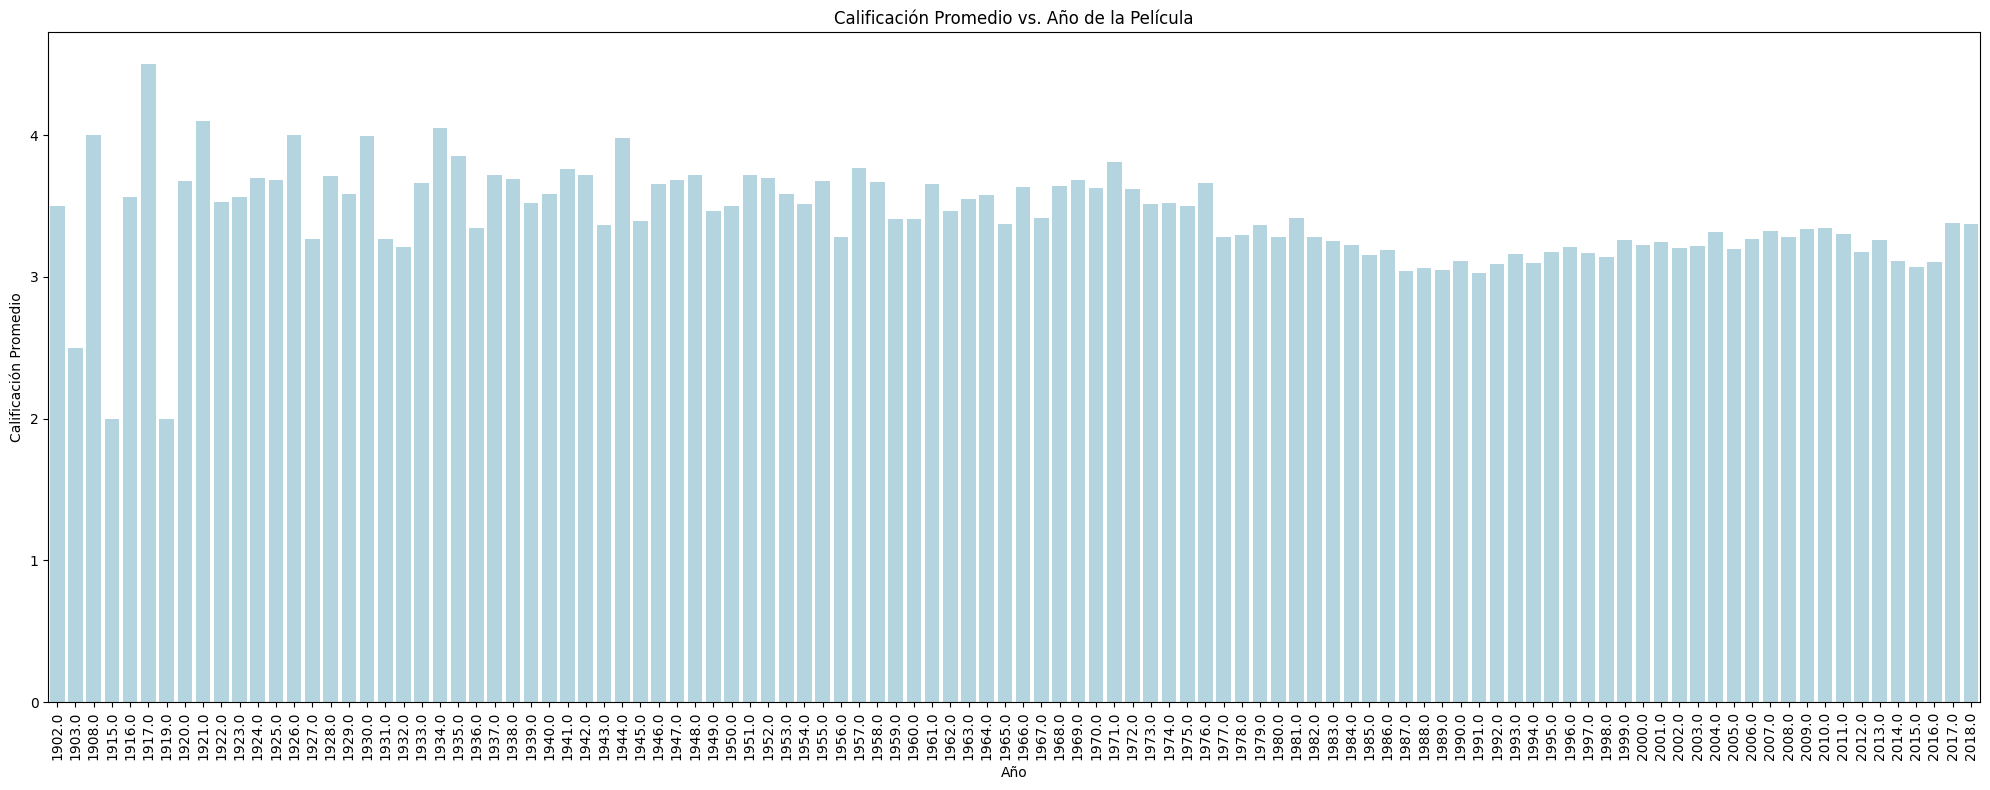

In [26]:
# Paso 1: Extraer el año de la columna 'title' en 'movies_df'
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# Paso 2: Calcular la calificación media y el número de calificaciones para cada película
# Realizamos el agrupamiento por 'movieId' y calculamos la media y el conteo de 'rating'
ratings_summary = ratings_df.groupby('movieId')['rating'].agg(mean_rating='mean', rating_count='count').reset_index()

# Paso 3: Combinar 'movies_df' con 'ratings_summary' para añadir la calificación media y el número de calificaciones
# Usamos un merge para combinar los DataFrames basados en 'movieId'
movies_with_ratings = pd.merge(movies_df, ratings_summary, on='movieId', how='left')

# Paso 4: Limpiar y preparar los datos
# Convertimos la columna 'year' a numérico y eliminamos filas donde 'year' sea nulo
movies_with_ratings['year'] = pd.to_numeric(movies_with_ratings['year'], errors='coerce')
movies_with_ratings.dropna(subset=['year'], inplace=True)

# Paso 5: Calcular la calificación promedio para cada año
# Agrupamos por 'year' y calculamos la media de 'mean_rating'
yearly_average_rating = movies_with_ratings.groupby('year')['mean_rating'].mean().reset_index()

# Paso 6: Ordenar los resultados por año de forma ascendente para mejorar la visualización
yearly_average_rating.sort_values(by='year', ascending=True, inplace=True)

# Paso 7: Visualizar los resultados
# Creamos un diagrama de barras para mostrar la calificación promedio por año
plt.figure(figsize=(20, 8))
sns.barplot(x='year', y='mean_rating', data=yearly_average_rating, color='lightblue')

# Configuramos los ejes y título para claridad
plt.xticks(rotation=90)
plt.title('Calificación Promedio vs. Año de la Película')
plt.xlabel('Año')
plt.ylabel('Calificación Promedio')

# Ajustamos la disposición para asegurar que no hay elementos recortados en la visualización
plt.tight_layout()
plt.show()

**c) (0,5 puntos)**
Genere un diagrama de dispersión que represente la calificación promedio versus el número de calificaciones. Utilice diferentes colores para representar películas de diferentes décadas.

Sugerencia: use _seaborn.scatterplot para generar el diagrama de dispersión y el parámetro 'hue' para agrupar películas con el mismo color de símbolo.

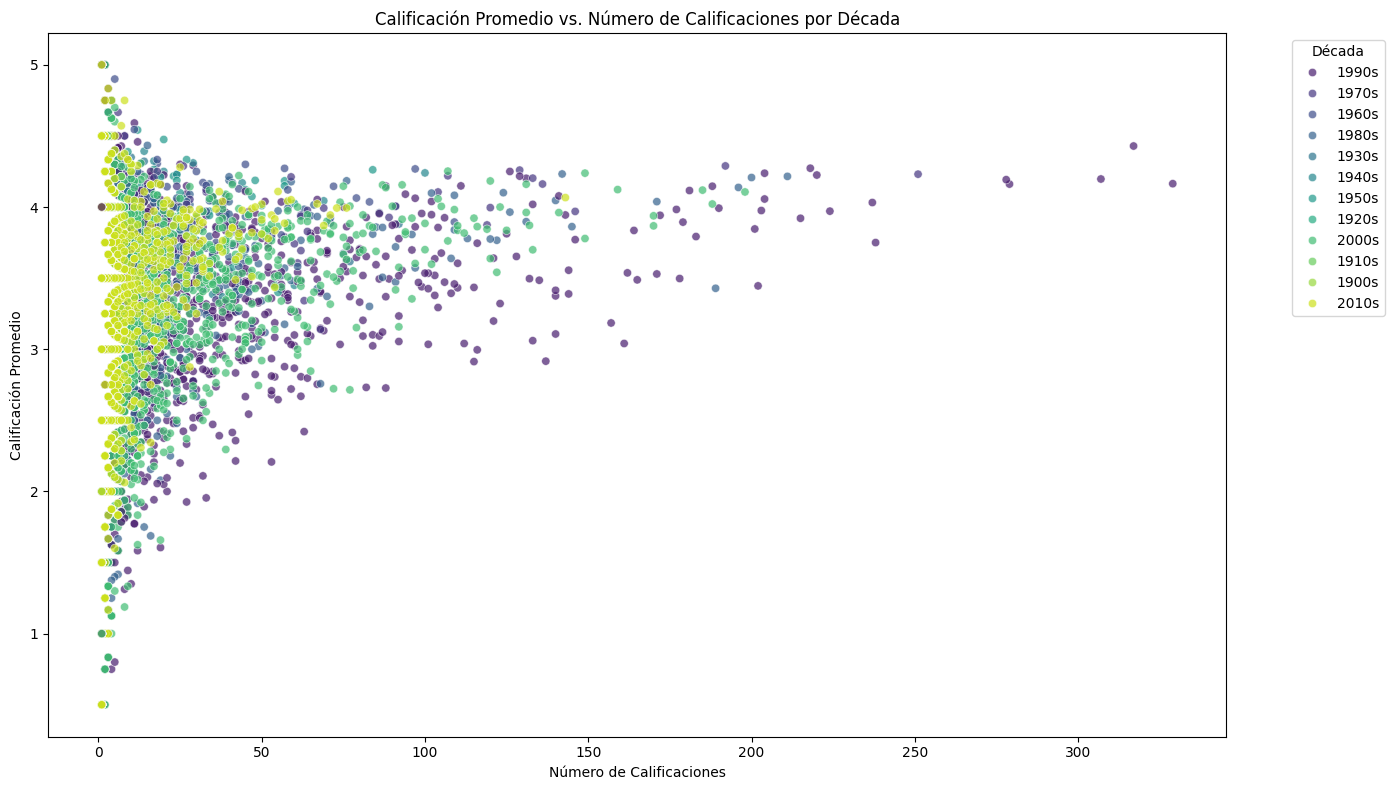

In [19]:
# Paso 1: Clasificar películas por décadas
# Calcular la década para cada película y crear una nueva columna 'decade'
movies_with_ratings['decade'] = (movies_with_ratings['year'] // 10 * 10).astype(int).astype(str) + 's'

# Paso 2: Limpiar los datos
# Eliminar filas donde pueda faltar el número de calificaciones o la calificación promedio
# Esto asegura que solo trabajemos con datos completos
movies_with_ratings.dropna(subset=['rating_count', 'mean_rating', 'decade'], inplace=True)

# Paso 3: Crear el diagrama de dispersión
# Configurar el tamaño de la figura para una mejor visualización
plt.figure(figsize=(14, 8))

# Usar seaborn.scatterplot para dibujar el diagrama de dispersión
# 'x' es el número de calificaciones, 'y' es la calificación promedio, y 'hue' es la década
# Esto permite visualizar cómo las calificaciones promedio se comparan con el número de calificaciones,
# con colores que representan diferentes décadas
sns.scatterplot(x='rating_count', y='mean_rating', hue='decade', data=movies_with_ratings,
                palette='viridis', alpha=0.7)  # 'alpha' controla la transparencia de los puntos

# Añadir títulos y etiquetas para mayor claridad
plt.title('Calificación Promedio vs. Número de Calificaciones por Década')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Calificación Promedio')

# Mover la leyenda fuera del gráfico para no bloquear ningún dato
plt.legend(title='Década', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para llenar el área del gráfico
plt.show()

**d) (0.5 points)**

Genere un diagrama de dispersión que represente la calificación promedio, la década y los números de calificacions.

Sugerencia: use _seaborn.pairplot para generar el diagrama de dispersión y el parámetro 'vars' para elegir qué columnas son representadas.

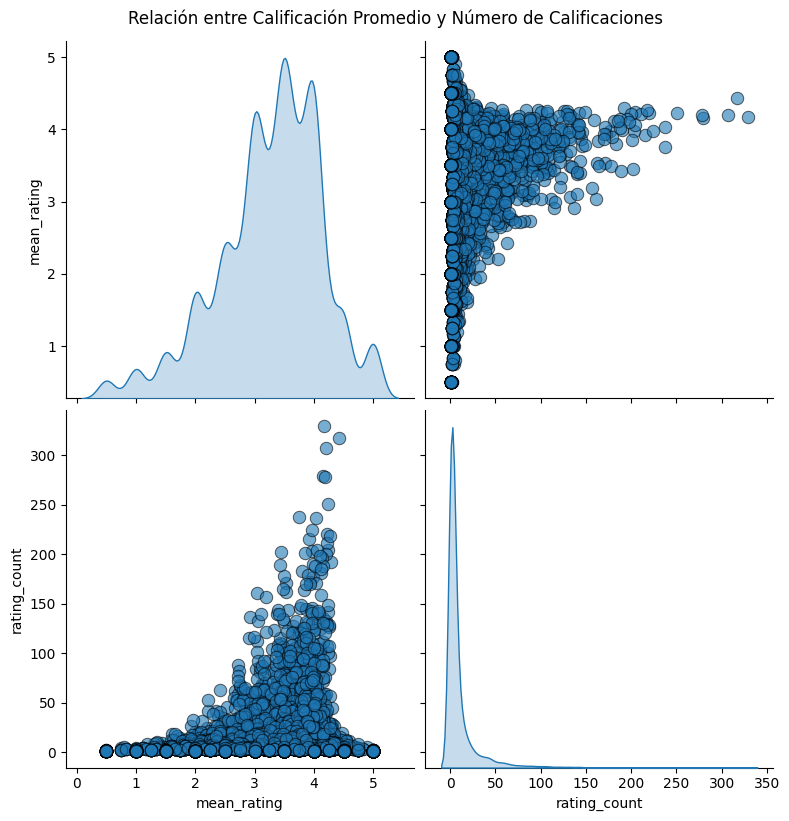

In [20]:
# Utilizar seaborn.pairplot para visualizar las relaciones entre 'mean_rating' y 'rating_count'

# Seaborn automáticamente generará una matriz de gráficos para estas variables numéricas

# Configuración de pairplot:
# - vars: Lista de nombres de columnas en 'movies_with_ratings' que queremos visualizar.
#         En este caso, estamos interesados en 'mean_rating' y 'rating_count'.
# - diag_kind: Especifica el tipo de gráfico que se muestra en la diagonal de la matriz.
#              'kde' representa la estimación de densidad del kernel, proporcionando una suave
#              distribución de cada variable.
# - plot_kws: Un diccionario de argumentos de palabras clave que se pasan a la función de
#             plot subyacente utilizada para dibujar los gráficos de dispersión. Aquí, configuramos
#             la transparencia (alpha), el tamaño del punto (s) y el color del borde (edgecolor).
# - height: Controla el tamaño de los gráficos generados.

# Generar el pairplot
sns.pairplot(data=movies_with_ratings,
             vars=['mean_rating', 'rating_count'], # Especificar las columnas para el análisis
             diag_kind='kde', # Usar KDE para las gráficas diagonales
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, # Estilo de los puntos en el gráfico de dispersión
             height=4) # Tamaño de los gráficos

# Título del gráfico
# Ajustamos el título utilizando plt.suptitle y personalizamos su posición con 'y=1.02'
plt.suptitle('Relación entre Calificación Promedio y Número de Calificaciones', y=1.02)

# Mostrar el gráfico
plt.show()

**e) (1 punto)** Agrupe los datos 2D (calificación media y número de calificaciones) usando un algoritmo de k-medias con k=2. Representa los resultados de la agrupación indicando la ubicación de los centroides.

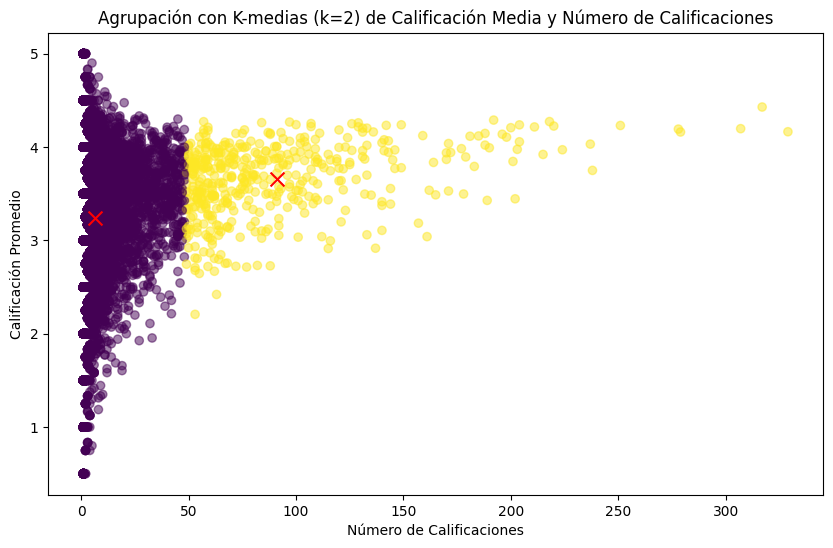

In [23]:
from sklearn.cluster import KMeans

# Preparar los datos para el clustering
X = movies_with_ratings[['mean_rating', 'rating_count']].dropna()

# Aplicar k-medias con k=2, especificando explícitamente n_init=10 para suprimir el warning
# y prepararse para los cambios futuros en sklearn
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Representar los resultados
# Dibujar los puntos de datos, coloreando por etiqueta de cluster
plt.figure(figsize=(10, 6))
plt.scatter(X['rating_count'], X['mean_rating'], c=labels, alpha=0.5, cmap='viridis')

# Dibujar los centroides
# Nota: el orden de las coordenadas se invierte para que coincida con los ejes x e y respectivamente
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=100, marker='x')

# Configurar los títulos y etiquetas para mejorar la comprensión del gráfico
plt.title('Agrupación con K-medias (k=2) de Calificación Media y Número de Calificaciones')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Calificación Promedio')

# Mostrar el gráfico
plt.show()

**f) (0,5 puntos)** Repita el agrupamiento de la sección anterior después de escalar los datos (estandarización, use la función StandardScaler de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Comente los resultados. ¿Cuál es el efecto principal de escalar los datos en el resultado de la agrupación?

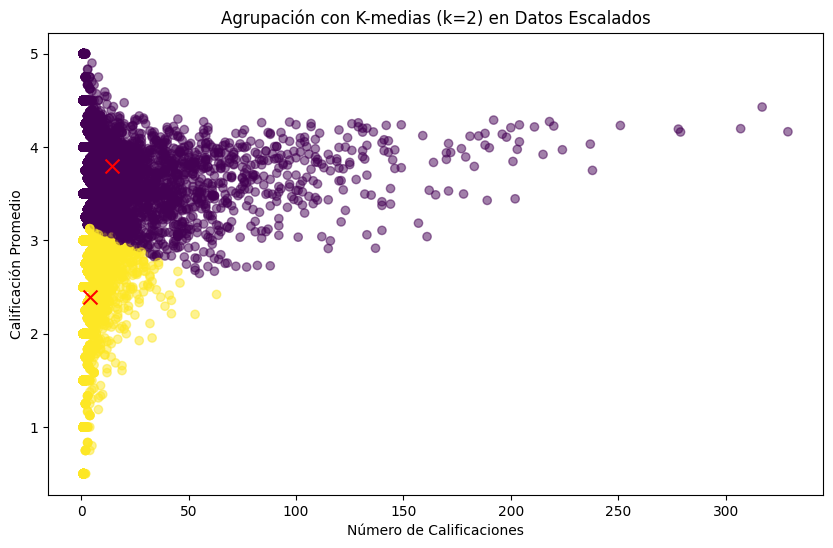

In [25]:
# Paso 1: Preparación de los datos
# Extraemos las columnas de interés y eliminamos filas con valores nulos
X = movies_with_ratings[['mean_rating', 'rating_count']].dropna()

# Paso 2: Estandarización de los datos
# Inicializamos y ajustamos StandardScaler para normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Aplicación del algoritmo de k-medias
# Inicializamos y ajustamos el modelo k-medias con k=2 sobre los datos estandarizados
kmeans_scaled = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_scaled)

# Paso 4: Extracción de resultados
# Obtenemos las etiquetas de los clusters y los centroides en el espacio escalado
labels_scaled = kmeans_scaled.labels_
centroids_scaled = kmeans_scaled.cluster_centers_

# Transformamos los centroides de vuelta al espacio original para interpretación
centroids_scaled_back = scaler.inverse_transform(centroids_scaled)

# Paso 5: Visualización de los resultados
# Configuramos el tamaño de la figura para mejorar la visualización
plt.figure(figsize=(10, 6))

# Dibujamos los puntos de datos, coloreando por la etiqueta del cluster
plt.scatter(X['rating_count'], X['mean_rating'], c=labels_scaled, alpha=0.5, cmap='viridis')

# Dibujamos los centroides escalados y transformados de vuelta al espacio original
plt.scatter(centroids_scaled_back[:, 1], centroids_scaled_back[:, 0], c='red', s=100, marker='x')

# Añadimos título y etiquetas a los ejes para claridad
plt.title('Agrupación con K-medias (k=2) en Datos Escalados')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Calificación Promedio')

# Mostramos el gráfico
plt.show()